# Titanic Project : 

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1 - Business Understanding 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### Cabin has 687 null values , Age has 177 values

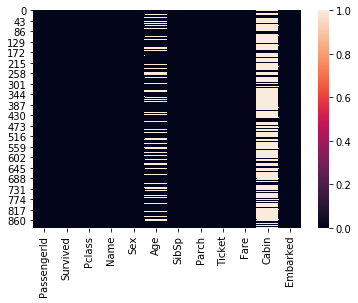

In [5]:
sns.heatmap(df.isna())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# we will delete some columns , we don't need them
df1 = df.drop(['PassengerId','Name','SibSp',
            'Parch','Ticket','Fare','Cabin','Embarked'], axis = "columns")

In [9]:
df1.shape

(891, 4)

In [10]:
df1.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


In [11]:
df2 = df1.dropna(axis = "rows")

In [12]:
df2.shape

(714, 4)

## 2 - Exploratory Data Analysis

In [13]:
df2.head()

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0


### Relation Sex/Survived

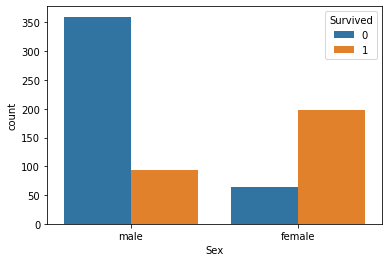

In [14]:
sns.countplot(x ="Sex" , hue = "Survived" ,data = df2)

In [15]:
df2.groupby(['Sex', 'Pclass']).mean()

Survived        Age
Sex    Pclass                     
female 1       0.964706  34.611765
       2       0.918919  28.722973
       3       0.460784  21.750000
male   1       0.396040  41.281386
       2       0.151515  30.740707
       3       0.150198  26.507589

In [16]:
df2.groupby(['Pclass', 'Sex']).mean()

Survived        Age
Pclass Sex                        
1      female  0.964706  34.611765
       male    0.396040  41.281386
2      female  0.918919  28.722973
       male    0.151515  30.740707
3      female  0.460784  21.750000
       male    0.150198  26.507589

### Relation Age/Survived

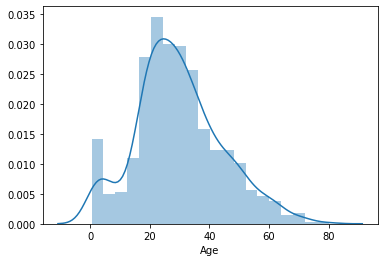

In [17]:
sns.distplot(df2['Age'])

### Relation Pclass/Age - Survived 

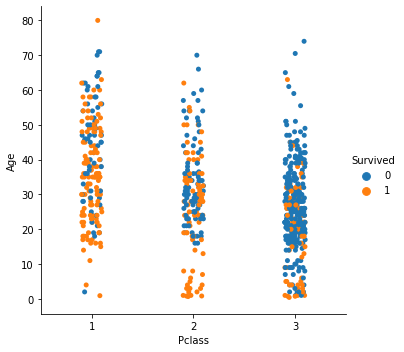

In [18]:
sns.catplot(x="Pclass", y="Age", hue="Survived", data=df2)

### Correlation

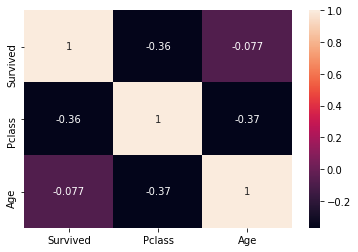

In [19]:
sns.heatmap(df2.corr(),annot=True )

## 3- Feature Engineering

In [20]:
df2['Sex'] = pd.to_numeric(df2['Sex'].replace(['male', 'female'],[1,0]))

C:\Users\KOUSSAY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 4 - Modeling 

In [21]:
X = df2[['Pclass','Sex','Age']]
y = df2['Survived']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test , y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state = 0)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [25]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3 = LogisticRegression()

In [26]:
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.786046511627907

In [27]:
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

0.7395348837209302

In [28]:
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

0.8325581395348837

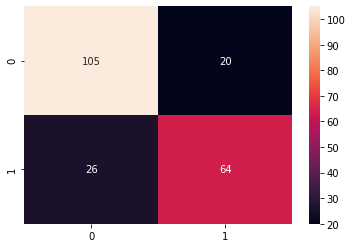

In [29]:
y_pred1 = model1.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True , fmt="d")

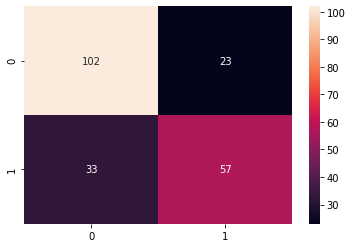

In [30]:
y_pred2 = model2.predict(X_test)
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True , fmt="d")

In [31]:
y_pred3 = model3.predict(X_test)

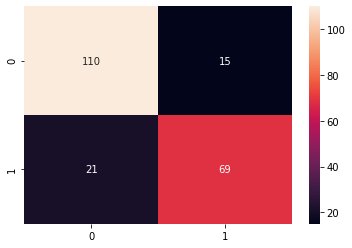

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True , fmt="d")

## 4 - Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [34]:
cross = cross_val_score(model3 , X_train , y_train , cv = 5 ,  scoring ="accuracy")
cross


array([0.8       , 0.76      , 0.76      , 0.77      , 0.82828283])

In [35]:
print("Cross Validation" ,cross.mean(axis =0))

Cross Validation 0.7836565656565657


## 5 - GridSerachCV

In [36]:
def find_best_with_gs(X,y):
    algos = {
    "DecisionTreeClassifier" :  {
            "model": DecisionTreeClassifier() , 
            "params" : { 
                        "criterion" : ["gini", "entropy"] , 
                        "splitter" : ["best", "random"]
                    }
                                 },
    


    "KNN":  {
    
        "model" : KNeighborsClassifier() ,
        "params" : {
            'n_neighbors' : np.arange(1,20),
                 'metric': ['euclidean' , 'manhattan']
                    }
            }
    
  
 }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
            gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
            gs.fit(X,y)
            scores.append({
            'Model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
            })

    return pd.DataFrame(scores,columns=['Model','best_score','best_params']) 
                              

In [37]:
find_best_with_gs(X,y)

,Model,best_score,best_params
0,DecisionTreeClassifier,0.816783,"{'criterion': 'entropy', 'splitter': 'random'}"
1,KNN,0.769231,"{'metric': 'manhattan', 'n_neighbors': 13}"


## 6 - AdaBoost Classifier

In [38]:
# We will use AdaBoostClassifier as a classfier

In [39]:
from sklearn.ensemble import AdaBoostClassifier

In [40]:
model_Ada = AdaBoostClassifier(n_estimators = 100)
model_Ada.fit(X_train , y_train)
model_Ada.score(X_test,y_test)

0.8

## 7 - RESUME

In [49]:
models = ["DecisionTreeClassifier" , "KNeighborsClassifier" , "LogisticRegression" , "AdaBoostClassifier"]
scores = [model1.score(X_test,y_test) , model2.score(X_test,y_test) , model3.score(X_test,y_test), 
          model_Ada.score(X_test,y_test)]
score_resume = pd.DataFrame(zip(models,scores), columns = ['Model', 'Score'])


In [50]:
print("Scores Before Optimisation")
score_resume


Scores Before Optimisation


,Model,Score
0,DecisionTreeClassifier,0.786047
1,KNeighborsClassifier,0.739535
2,LogisticRegression,0.832558
3,AdaBoostClassifier,0.800000


In [51]:
print("Scores After Optimisation")
find_best_with_gs(X,y)

Scores After Optimisation


,Model,best_score,best_params
0,DecisionTreeClassifier,0.816783,"{'criterion': 'entropy', 'splitter': 'random'}"
1,KNN,0.769231,"{'metric': 'manhattan', 'n_neighbors': 13}"


## 8 - Prediction

In [54]:
name = input("Votre Nom : ")
pclass = int(input("Votre Classe : "))
sex = int(input("Votre Sexe : "))
age = int(input("Votre Age : "))

def predict(model3,name,pclass,sex,age):

    if ((1<=pclass <=3 ) & ((sex == 0) | (sex == 1))):
        if model3.predict([[pclass,sex,age]]) == np.array([0]):
            print(name ,'est mort')
        else:
            print(name , 'est vivant')
        
    else : 
        print('Veuillez insérer des données correctes')
     

Votre Nom :  Koussay Abdouli
Votre Classe :  1
Votre Sexe :  1
Votre Age :  25


In [55]:
predict(model3,name,pclass,sex,age)        


Koussay Abdouli est vivant
